In [1]:
# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 활성화 함수

In [17]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

그림 저장: activation_functions_plot


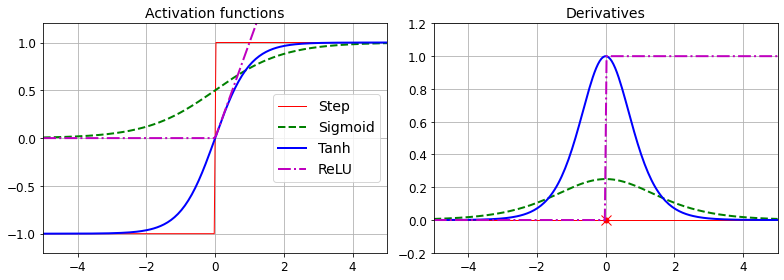

In [18]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()

In [3]:
#퍼셉트론(Threshold login unit)

import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, 2:]#꽃잎의 길이와 너비
y = (iris.target == 0).astype(np.int) #setosa인지 여부

per_clf = Perceptron() #SGDClassifier와 같음(loss="perceptron", learning_rate="constant", eta0=1, penalty=None)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])
y_pred

array([0])

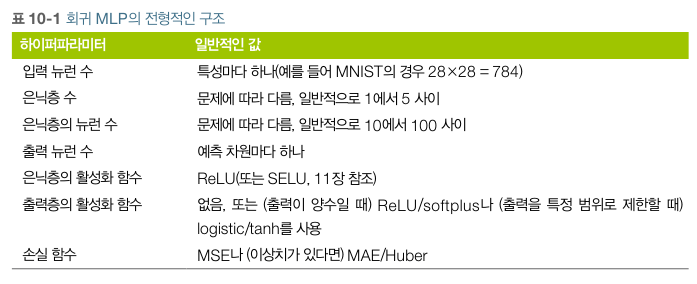

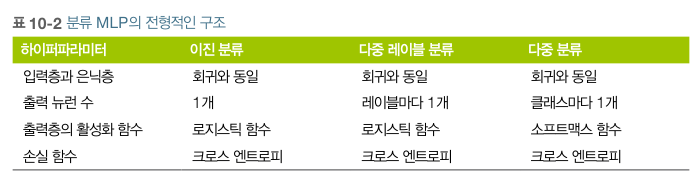

In [4]:
import tensorflow as tf
from tensorflow import keras

tf.__version__, keras.__version__

('2.2.0', '2.3.0-tf')

# 시퀀셜 API로 이미지 분류기 만들기

In [59]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [60]:
X_train_full.shape, X_train_full.dtype, X_train_full[0], X_test[0]

((60000, 28, 28),
 dtype('uint8'),
 array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
           0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
           1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
           0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
           0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
           0, 102, 204, 176, 134, 144, 123,  23,   

In [61]:
#테스트 세트에서 검증세트 분리
#픽셀 강도를 255.0로 나눠서 0~1 사이의 범위로 조정

X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [62]:
X_train[0], X_test[0]

(array([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.00392157,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.17254902, 0.49803922, 0.71372549, 0.7254902 ,
         0.63137255, 0.47058824, 0.21568627, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.16470588,
         0.77647059, 0.98431373, 1.        , 0.98431373, 0.97647059,
         0.

In [63]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

class_names[y_train[0]]

'Coat'

그림 저장: fashion_mnist_plot


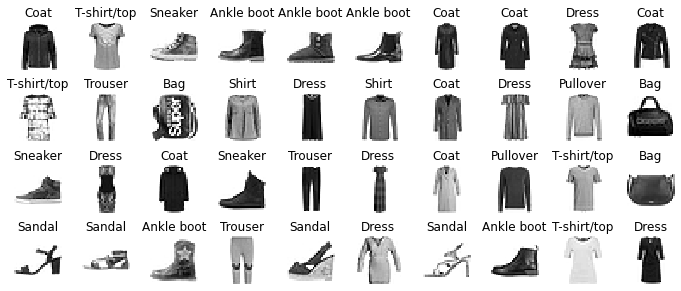

In [64]:
n_rows = 4
n_cols = 10

plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis("off")
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig("fashion_mnist_plot", tight_layout=False)
plt.show()

In [65]:
#두 개의 은닉층으로 이루어진 다층 퍼셉트론

# model = keras.models.Sequential()
# model.add(keras.layers.Flatten(input_shape=[28, 28])) #입력 이미지를 1차원 배열로 변환
# model.add(keras.layers.Dense(300, activation="relu"))
# model.add(keras.layers.Dense(100, activation="relu"))
# model.add(keras.layers.Dense(10, activation="softmax"))

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [66]:
hidden1 = model.layers[1]

model.layers, hidden1, hidden1.name, model.get_layer('dense') is hidden1

([<tensorflow.python.keras.layers.core.Flatten at 0x27725f23df0>,
 'dense',
 True)

In [67]:
weights, biases = hidden1.get_weights()

weights, weights.shape, biases, biases.shape

(array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
          0.03859074, -0.06889391],
        [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
         -0.02763776, -0.04165364],
        [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
          0.07121518, -0.07331658],
        ...,
        [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
          0.00228987,  0.05581069],
        [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
          0.00034875,  0.02878492],
        [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
          0.00272203, -0.06793761]], dtype=float32),
 (784, 300),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0

In [68]:
#샘플의 레이블에 들어있는 타겟 클래스가 배타적이므로 sparse_categorical_crossentropy(sparse=희소한)
#레이블이 원핫 인코딩과 같이 타겟에 대한 확률이라면 categorical_crossentropy
#sparse label을 원핫 인코딩하려면 keras.utils.to_categorical()
#원핫 인코딩에서 sparse label로 변환은 np.argmax( , axis=1)

#최적화 함수 - 확률적 경사하강법(학습률 기본값 0.01)

#분류기 이므로 훈련과 평가시에 정확도를 측정하기 위해 accuracy설정

model.compile(loss=keras.losses.sparse_categorical_crossentropy,#"sparse_categorical_crossentropy"
              optimizer=keras.optimizers.SGD(),#"sgd"
              metrics=[keras.metrics.sparse_categorical_accuracy] #"accuracy"
             )

In [69]:
#모델 훈련

history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid)) #validation_split=0.1 테스트 데이터의 10%를 검증에 사용

Epoch 1/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.7237 - sparse_categorical_accuracy: 0.7643 - val_loss: 0.5213 - val_sparse_categorical_accuracy: 0.8226
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4842 - sparse_categorical_accuracy: 0.8316 - val_loss: 0.4351 - val_sparse_categorical_accuracy: 0.8514
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4391 - sparse_categorical_accuracy: 0.8455 - val_loss: 0.5269 - val_sparse_categorical_accuracy: 0.8008
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4123 - sparse_categorical_accuracy: 0.8567 - val_loss: 0.3915 - val_sparse_categorical_accuracy: 0.8648
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3939 - sparse_categorical_accuracy: 0.8620 - val_loss: 0.3746 - val_sparse_categorical_accuracy: 0.8694
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3750 - spars

30번 에포크 후에 검증 정확도가 89.3%, 테스트 정확도가 91.98%이므로 큰 차이가 없어서 과대 적합은 아닌 걸로

In [70]:
history.params, history.epoch, history.history.keys()

({'verbose': 1, 'epochs': 30, 'steps': 1719},
 [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy']))

그림 저장: keras_learning_curves_plot


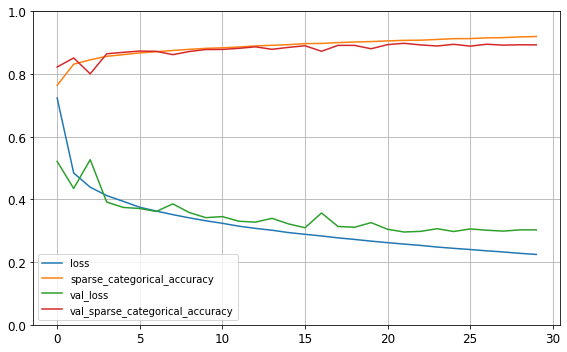

In [71]:
import pandas as pd

#딕셔너리를 데이터프레임으로 변환 후 그래프 표시
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) #수직 축의 범위를 [0-1]사이로 설정
save_fig("keras_learning_curves_plot")
plt.show()

검증 손실은 에포크가 끝난 후에 계산되고, 훈련 손실은 에포크가 진행되는 동안 계산된다.

케라스에서는 fit()을 다시 호출하면 중지되었던 곳 부터 훈련을 이어갈 수 있다.

하이퍼 파라미터 튜닝시

학습률 -> 옵티마이저(변경시 학습률 다시 튜닝 필요) -> 층 개수 -> 층의 뉴런 개수 -> 은닉층의 활성화 함수 순서

In [72]:
#테스트 모델로 평가

model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 831us/step - loss: 0.3366 - sparse_categorical_accuracy: 0.8826


[0.3366280198097229, 0.8826000094413757]

검증 세트보다 테스트 세트에서 성능이 조금 낮은 것인 일반적.

물론 여기서는 하이퍼 파라미터 튜닝도 하지 않았음.

절대로 테스트 세트에서 하이퍼 파라미터 튜닝은 금지

In [73]:
# 예측

#새로운 샘플이 없으므로 테스트 세트에서 가져오기
X_new = X_test[:3]
y_proba = model.predict(X_new)

y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.96],
       [0.  , 0.  , 0.98, 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [77]:
y_pred = np.argmax(y_proba, axis=1)

y_pred_classes = [class_names[pred] for pred in y_pred]

y_pred, y_pred_classes, y_test[:3]

(array([9, 2, 1], dtype=int64),
 ['Ankle boot', 'Pullover', 'Trouser'],
 array([9, 2, 1], dtype=uint8))

# 시퀀셜 API로 회귀용 다층 퍼셉트론 만들기

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing() #ocean_proximity 특성이 없고, 누락된 데이터도 없음

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

X_train[:3]

array([[ 3.52140000e+00,  1.50000000e+01,  3.04994451e+00,
         1.10654828e+00,  1.44700000e+03,  1.60599334e+00,
         3.76300000e+01, -1.22430000e+02],
       [ 5.32750000e+00,  5.00000000e+00,  6.49005964e+00,
         9.91053678e-01,  3.46400000e+03,  3.44333996e+00,
         3.36900000e+01, -1.17390000e+02],
       [ 3.10000000e+00,  2.90000000e+01,  7.54237288e+00,
         1.59152542e+00,  1.32800000e+03,  2.25084746e+00,
         3.84400000e+01, -1.22980000e+02]])

In [3]:
#스케일 조정

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

X_train[:3]

array([[-0.19397883, -1.07781319, -0.94338545,  0.01485314,  0.02073335,
        -0.57291624,  0.92926047, -1.42215523],
       [ 0.75198318, -1.868895  ,  0.40547793, -0.23327682,  1.8614649 ,
         0.20516532, -0.91654738,  1.09666969],
       [-0.41469108,  0.02970134,  0.81808819,  1.05678372, -0.08786707,
        -0.29983271,  1.30872858, -1.697027  ]])

In [87]:
#랜덤 시드 설정
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [81]:
X_train.shape, X_train.shape[1:]

((11610, 8), (8,))

In [88]:
model = keras.models.Sequential([
    #잡음이 많은 데이터셋을 사용하므로 과대적합을 막기 위해 뉴런수가 작은 은닉층 한 개
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]), 
    keras.layers.Dense(1) #주택 가격 1개만을 예측 하므로
])

model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                   validation_data=(X_valid, y_valid))

mse_test = model.evaluate(X_test, y_test)

X_new = X_test[:3] #새로운 샘플이라고 가정
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 0s 854us/step - loss: 1.6419 - val_loss: 0.8077
Epoch 2/20
363/363 [==============================] - 0s 725us/step - loss: 0.7047 - val_loss: 0.6736
Epoch 3/20
363/363 [==============================] - 0s 725us/step - loss: 0.6345 - val_loss: 0.6243
Epoch 4/20
363/363 [==============================] - 0s 766us/step - loss: 0.5977 - val_loss: 0.5977
Epoch 5/20
363/363 [==============================] - 0s 755us/step - loss: 0.5706 - val_loss: 0.5708
Epoch 6/20
363/363 [==============================] - 0s 733us/step - loss: 0.5472 - val_loss: 0.5538
Epoch 7/20
363/363 [==============================] - 0s 727us/step - loss: 0.5288 - val_loss: 0.5370
Epoch 8/20
363/363 [==============================] - 0s 763us/step - loss: 0.5130 - val_loss: 0.5257
Epoch 9/20
363/363 [==============================] - 0s 780us/step - loss: 0.4992 - val_loss: 0.5142
Epoch 10/20
363/363 [==============================] - 0s 766us/step - loss: 0.487

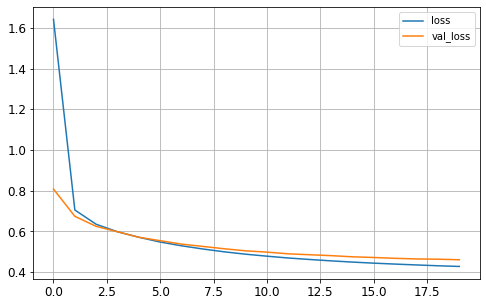

In [89]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

In [90]:
mse_test, y_pred, y_test[:3]

(0.4190308451652527,
 array([[0.3276104],
        [1.7185786],
        [3.3415675]], dtype=float32),
 array([0.477  , 0.458  , 5.00001]))

# 함수형 API로 복잡한 모델 만들기

와이드 & 딥 신경망

신경망이 복잡한 패턴(깊게 쌓은 층을 이용)과 간단한 규칙(짧은 경로 사용)을 모두 학습할 수 있음

MLP(다층 퍼셉트론)의 경우 모든 층에 데이터를 통과 시키므로 데이터의 간단한 패턴이 연속된 변환으로 인해 왜곡될 수 있음

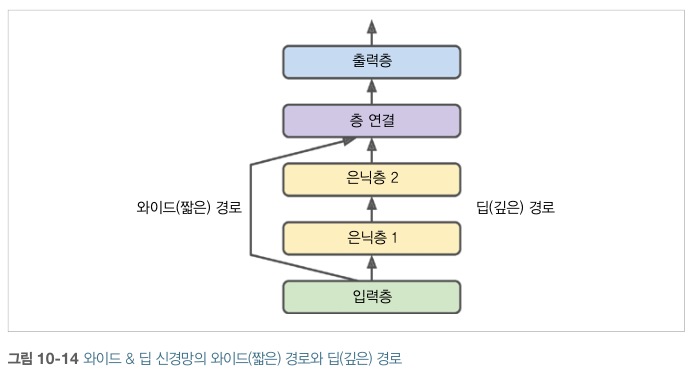

In [92]:
input_ = keras.layers.Input(shape=X_train.shape[1:])               #입력층
hidden1 = keras.layers.Dense(30, activation="relu")(input_)  #입력층과 함께 연결
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1) #첫번째 은닉층의 출력을 전달
concat = keras.layers.Concatenate()([input_, hidden2])       #입력과 두번째 은닉층의 출력을 연결
output = keras.layers.Dense(1)(concat)                       #concat층이 만든 결과를 사용해 호출
model = keras.Model(inputs=[input_], outputs=[output]) 

In [93]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 30)           930         dense_2[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_3[0][0]                

In [94]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                   validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 0s 959us/step - loss: 1.8772 - val_loss: 0.7117
Epoch 2/20
363/363 [==============================] - 0s 857us/step - loss: 0.6501 - val_loss: 0.6067
Epoch 3/20
363/363 [==============================] - 0s 906us/step - loss: 0.6012 - val_loss: 0.5734
Epoch 4/20
363/363 [==============================] - 0s 915us/step - loss: 0.5654 - val_loss: 0.5587
Epoch 5/20
363/363 [==============================] - 0s 846us/step - loss: 0.5414 - val_loss: 0.5351
Epoch 6/20
363/363 [==============================] - 0s 843us/step - loss: 0.5181 - val_loss: 0.5180
Epoch 7/20
363/363 [==============================] - 0s 843us/step - loss: 0.5035 - val_loss: 0.5040
Epoch 8/20
363/363 [==============================] - 0s 837us/step - loss: 0.4904 - val_loss: 0.5025
Epoch 9/20
363/363 [==============================] - 0s 854us/step - loss: 0.4769 - val_loss: 0.4885
Epoch 10/20
363/363 [==============================] - 0s 857us/step - loss: 0.467

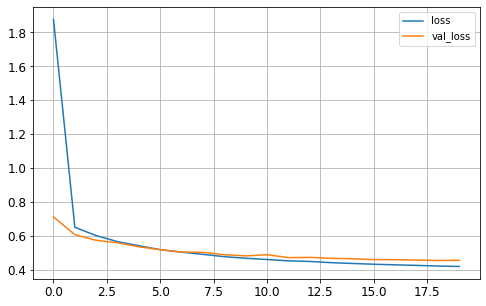

In [95]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

In [96]:
mse_test, y_pred, y_test[:3]

(0.4154709577560425,
 array([[0.3749532],
        [1.7645808],
        [3.6909447]], dtype=float32),
 array([0.477  , 0.458  , 5.00001]))

일부 특성은 짧은 경로로 전달하고 다른 특성은 깊은 경로로 전달하려면(중복될 수 있음)

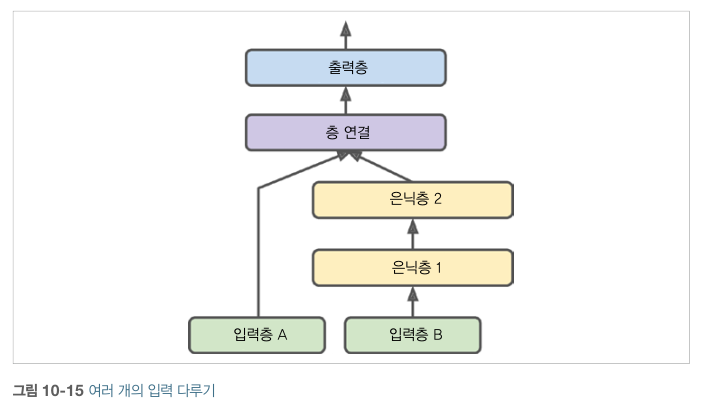

In [98]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [99]:
X_train.shape

(11610, 8)

In [100]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:] #첫 5개의 특성을 A로, 3번째 특성부터 나머지 6개를 B로
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                   validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 0s 983us/step - loss: 2.2735 - val_loss: 0.9264
Epoch 2/20
363/363 [==============================] - 0s 799us/step - loss: 0.7844 - val_loss: 0.7021
Epoch 3/20
363/363 [==============================] - 0s 840us/step - loss: 0.6371 - val_loss: 0.6246
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5708 - val_loss: 0.5855
Epoch 5/20
363/363 [==============================] - 0s 799us/step - loss: 0.5281 - val_loss: 0.5509
Epoch 6/20
363/363 [==============================] - 0s 829us/step - loss: 0.4979 - val_loss: 0.5318
Epoch 7/20
363/363 [==============================] - 0s 871us/step - loss: 0.4771 - val_loss: 0.5160
Epoch 8/20
363/363 [==============================] - 0s 826us/step - loss: 0.4641 - val_loss: 0.5046
Epoch 9/20
363/363 [==============================] - 0s 815us/step - loss: 0.4547 - val_loss: 0.4980
Epoch 10/20
363/363 [==============================] - 0s 802us/step - loss: 0.4481 

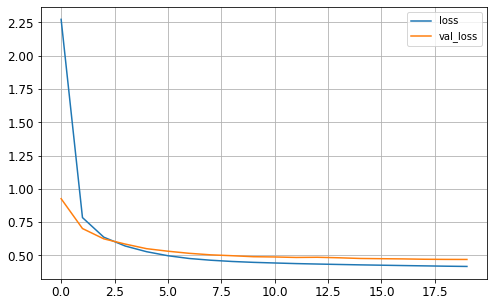

In [101]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

In [102]:
mse_test, y_pred, y_test[:3]

(0.42211905121803284,
 array([[0.3260112],
        [1.927024 ],
        [3.624107 ]], dtype=float32),
 array([0.477  , 0.458  , 5.00001]))

규제를 위한 보조 출력 추가하기

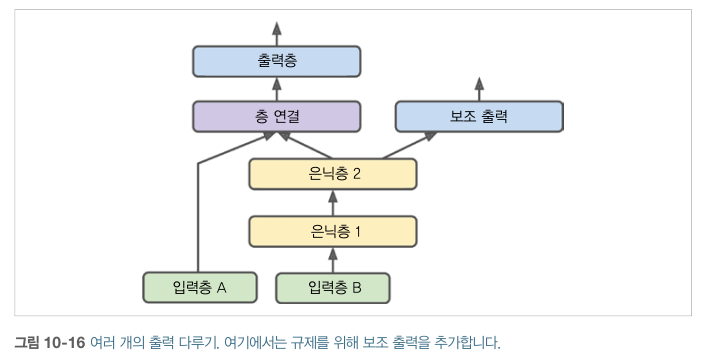

In [104]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(
    inputs=[input_A, input_B], 
    outputs=[output, aux_output])

In [105]:
model.compile(
    loss=["mse", "mse"],    #출력 별로 손실 함수 설정
    loss_weights=[0.9, 0.1],#출력별 손실 가중치 설정(메인 출력에 더 관심이 많다)
    optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [106]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                   validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 0s 1ms/step - loss: 2.4779 - output_loss: 2.2495 - aux_output_loss: 4.5334 - val_loss: 1.2682 - val_output_loss: 1.0478 - val_aux_output_loss: 3.2519
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 1.0367 - output_loss: 0.8524 - aux_output_loss: 2.6948 - val_loss: 0.9032 - val_output_loss: 0.7654 - val_aux_output_loss: 2.1439
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.8111 - output_loss: 0.6882 - aux_output_loss: 1.9164 - val_loss: 0.7747 - val_output_loss: 0.6687 - val_aux_output_loss: 1.7289
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7203 - output_loss: 0.6216 - aux_output_loss: 1.6083 - val_loss: 0.7170 - val_output_loss: 0.6220 - val_aux_output_loss: 1.5715
Epoch 5/20
363/363 [==============================] - 0s 950us/step - loss: 0.6718 - output_loss: 0.5819 - aux_output_loss: 1.4805 - val_loss: 0.6798 - val_output_loss: 0.5879 - val_au

In [107]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test]
)

y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

total_loss, main_loss, aux_loss, y_pred_main, y_pred_aux

162/162 [==============================] - 0s 562us/step - loss: 0.4962 - output_loss: 0.4361 - aux_output_loss: 1.0368


(0.49615752696990967,
 0.4360833168029785,
 1.0368255376815796,
 array([[0.3704745],
        [1.8812222],
        [3.4159954]], dtype=float32),
 array([[1.1796402],
        [1.9586853],
        [2.7289188]], dtype=float32))

# 서브클래싱 API로 동적 모델 만들기

시퀀셜, 함수형API는 모두 선언적으로, 먼저 연결 방식을 정의해야 한다. 모델 저장, 복사, 공유가 쉬우므로 모델의 구조를 출력하거나 분석하기 좋다. 전체 모델이 층으로 구성된 정적 그래프이므로 디버깅도 쉽다

조건문을 가지는 등 동적 구조를 지원하는 명령형 프로그래밍 스타일이 필요하다면 서브클래싱 API를 사용한다.

In [113]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs) #표준 매개변수 처리
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output
    
model = WideAndDeepModel()

#call메서드 안에서 for, if, 텐서플로 저수준 연산 수행 가능
#하지만 케라스가 분석할 수 없으며, 모델을 저장하거나 복사할 수 없다.
#높은 유연성이 필요하지 않다면 시퀄셜, 함수형 API 사용 권장

In [114]:
model.compile(
    loss=["mse", "mse"],    #출력 별로 손실 함수 설정
    loss_weights=[0.9, 0.1],#출력별 손실 가중치 설정(메인 출력에 더 관심이 많다)
    optimizer=keras.optimizers.SGD(learning_rate=1e-3))

history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=20,
                   validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))

total_loss, main_loss, aux_loss = model.evaluate(
    (X_test_A, X_test_B), (y_test, y_test)
)

y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

total_loss, main_loss, aux_loss, y_pred_main, y_pred_aux

Epoch 1/20
363/363 [==============================] - 0s 1ms/step - loss: 2.6575 - output_1_loss: 2.4589 - output_2_loss: 4.4454 - val_loss: 1.1476 - val_output_1_loss: 0.8654 - val_output_2_loss: 3.6874
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 1.0179 - output_1_loss: 0.7781 - output_2_loss: 3.1764 - val_loss: 0.8830 - val_output_1_loss: 0.7003 - val_output_2_loss: 2.5268
Epoch 3/20
363/363 [==============================] - 0s 945us/step - loss: 0.8396 - output_1_loss: 0.6824 - output_2_loss: 2.2551 - val_loss: 0.7779 - val_output_1_loss: 0.6535 - val_output_2_loss: 1.8979
Epoch 4/20
363/363 [==============================] - 0s 953us/step - loss: 0.7484 - output_1_loss: 0.6358 - output_2_loss: 1.7611 - val_loss: 0.7200 - val_output_1_loss: 0.6258 - val_output_2_loss: 1.5685
Epoch 5/20
363/363 [==============================] - 0s 944us/step - loss: 0.6926 - output_1_loss: 0.6030 - output_2_loss: 1.4994 - val_loss: 0.6794 - val_output_1_loss: 0.5987 - 

(0.48003578186035156,
 0.4326625168323517,
 0.9063960313796997,
 array([[0.61023575],
        [2.017805  ],
        [3.7119174 ]], dtype=float32),
 array([[0.87123406],
        [1.8973595 ],
        [3.044809  ]], dtype=float32))

# 모델 저장과 복원

In [115]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [116]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 0s 945us/step - loss: 1.3757 - val_loss: 0.7895
Epoch 2/10
363/363 [==============================] - 0s 829us/step - loss: 0.7501 - val_loss: 0.7319
Epoch 3/10
363/363 [==============================] - 0s 815us/step - loss: 0.6959 - val_loss: 0.6871
Epoch 4/10
363/363 [==============================] - 0s 788us/step - loss: 0.6552 - val_loss: 0.6656
Epoch 5/10
363/363 [==============================] - 0s 796us/step - loss: 0.6204 - val_loss: 0.6262
Epoch 6/10
363/363 [==============================] - 0s 848us/step - loss: 0.5874 - val_loss: 0.6011
Epoch 7/10
363/363 [==============================] - 0s 843us/step - loss: 0.5594 - val_loss: 0.5765
Epoch 8/10
363/363 [==============================] - 0s 791us/step - loss: 0.5334 - val_loss: 0.5542
Epoch 9/10
363/363 [==============================] - 0s 862us/step - loss: 0.5087 - val_loss: 0.5349
Epoch 10/10
162/162 [==============================] - 0s 469us/step - loss: 0.454

In [117]:
#모델 저장

model.save("my_keras_model.h5")

In [118]:
#모델 불러오기

model = keras.models.load_model("my_keras_model.h5")

In [119]:
model.predict(X_new)

array([[0.90692717],
       [1.378661  ],
       [3.1528227 ]], dtype=float32)

In [120]:
#가중치 저장하기

model.save_weights("my_keras_weights.ckpt")

In [121]:
#가중치 불러오기

model.load_weights("my_keras_weights.ckpt")

# 훈련 과정에서 콜백 사용하기

훈련이 몇 시간 동안 지속되는 경우, 컴퓨터의 문제로 모두 잃지 않으려면 훈련 마지막에 모델을 저장하는 것 뿐만 아니라 훈련 도중 일정 간격으로 체크포인트를 저장해야 한다.

In [122]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [123]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [124]:
#조기 종료 구현

model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

#최상의 검증 세트 점수에서만 모델 저장
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])

model = keras.models.load_model("my_keras_model.h5") # 최상의 모델로 롤백

mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 0s 931us/step - loss: 1.8866 - val_loss: 0.7414
Epoch 2/10
363/363 [==============================] - 0s 793us/step - loss: 0.6577 - val_loss: 0.6221
Epoch 3/10
363/363 [==============================] - 0s 802us/step - loss: 0.5934 - val_loss: 0.5779
Epoch 4/10
363/363 [==============================] - 0s 818us/step - loss: 0.5557 - val_loss: 0.5572
Epoch 5/10
363/363 [==============================] - 0s 851us/step - loss: 0.5272 - val_loss: 0.5305
Epoch 6/10
363/363 [==============================] - 0s 840us/step - loss: 0.5033 - val_loss: 0.5113
Epoch 7/10
363/363 [==============================] - 0s 835us/step - loss: 0.4854 - val_loss: 0.4974
Epoch 8/10
363/363 [==============================] - 0s 832us/step - loss: 0.4709 - val_loss: 0.4903
Epoch 9/10
363/363 [==============================] - 0s 796us/step - loss: 0.4578 - val_loss: 0.4773
Epoch 10/10
162/162 [==============================] - 0s 481us/step - loss: 0.435

In [125]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

#조기 종료 콜백(10에포크 동안 검증 세트에서 점수가 향상되지 않으면 훈련 멈추기)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb]) #체크포인트 저장과 조기 종료 콜백 같이 사용

#조기 종료 콜백을 사용한 경우, 훈련이 끝난 후 최상의 가중치를 복원하기 때문에 저장된 모델 복원 하지 않아도 됨.

mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 0s 945us/step - loss: 0.4393 - val_loss: 0.4655
Epoch 2/100
363/363 [==============================] - 0s 843us/step - loss: 0.4315 - val_loss: 0.4627
Epoch 3/100
363/363 [==============================] - 0s 824us/step - loss: 0.4259 - val_loss: 0.4562
Epoch 4/100
363/363 [==============================] - 0s 835us/step - loss: 0.4201 - val_loss: 0.4554
Epoch 5/100
363/363 [==============================] - 0s 826us/step - loss: 0.4154 - val_loss: 0.4506
Epoch 6/100
363/363 [==============================] - 0s 804us/step - loss: 0.4111 - val_loss: 0.4461
Epoch 7/100
363/363 [==============================] - 0s 810us/step - loss: 0.4074 - val_loss: 0.4446
Epoch 8/100
363/363 [==============================] - 0s 815us/step - loss: 0.4040 - val_loss: 0.4434
Epoch 9/100
363/363 [==============================] - 0s 807us/step - loss: 0.4008 - val_loss: 0.4391
Epoch 10/100
363/363 [==============================] - 0s 821us/step - l

In [126]:
#사용자 정의 콜백
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [127]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

272/363 [=====================>........] - ETA: 0s - loss: 0.3423
val/train: 1.20
363/363 [==============================] - 0s 774us/step - loss: 0.3373 - val_loss: 0.4052


# 텐서 보드

In [128]:
#텐서 보드가 모니터링할 로그 폴더
root_logdir = os.path.join(os.curdir, "my_logs")

#실행 할 때 마다 다른 폴더를 생성하도록
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'.\\my_logs\\run_2020_07_17-11_27_48'

In [129]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [130]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [131]:
#텐서 보드 콜백을 통해 로그 디렉터리 생성
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 1.8866 - val_loss: 0.7414
Epoch 2/30
363/363 [==============================] - 0s 1ms/step - loss: 0.6577 - val_loss: 0.6221
Epoch 3/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5934 - val_loss: 0.5779
Epoch 4/30
363/363 [==============================] - 0s 967us/step - loss: 0.5557 - val_loss: 0.5572
Epoch 5/30
363/363 [==============================] - 0s 964us/step - loss: 0.5272 - val_loss: 0.5305
Epoch 6/30
363/363 [==============================] - 0s 972us/step - loss: 0.5033 - val_loss: 0.5113
Epoch 7/30
363/363 [==============================] - 0s 961us/step - loss: 0.4854 - val_loss: 0.4974
Epoch 8/30
363/363 [==============================] - 0s 964us/step - loss: 0.4709 - val_loss: 0.4903
Epoch 9/30
363/363 [==============================] - 0s 989us/step - loss: 0.4578 - val_loss: 0.4773
Epoch 10/30
363/363 [==============================] - 0s 985us/step - loss: 0.4474 - va

텐서 보드 실행하려면 

tensorboard --logdir=./my_logs --port=6006

그리고 브라우저에서 localhost:6006으로 접속

또는 노트북에서 다음과 같이 실행

In [133]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 9232), started 0:01:02 ago. (Use '!kill 9232' to kill it.)

In [134]:
# 한번 더 실행
run_logdir2 = get_run_logdir()
run_logdir2

'.\\my_logs\\run_2020_07_17-11_33_18'

In [135]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [136]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=0.05))

In [137]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5530 - val_loss: 3.4409
Epoch 2/30
363/363 [==============================] - 0s 1ms/step - loss: 5292745216.0000 - val_loss: 1.3230
Epoch 3/30
363/363 [==============================] - 0s 1ms/step - loss: 1.3411 - val_loss: 1.3176
Epoch 4/30
363/363 [==============================] - 0s 972us/step - loss: 1.3423 - val_loss: 1.3261
Epoch 5/30
363/363 [==============================] - 0s 970us/step - loss: 1.3423 - val_loss: 1.3154
Epoch 6/30
363/363 [==============================] - 0s 1ms/step - loss: 1.3431 - val_loss: 1.3203
Epoch 7/30
363/363 [==============================] - 0s 1ms/step - loss: 1.3425 - val_loss: 1.3149
Epoch 8/30
363/363 [==============================] - 0s 972us/step - loss: 1.3433 - val_loss: 1.3157
Epoch 9/30
363/363 [==============================] - 0s 975us/step - loss: 1.3435 - val_loss: 1.3150
Epoch 10/30
363/363 [==============================] - 0s 953us/step - loss: 1.3423

# 하이퍼파라미터 튜닝

In [10]:
#하이퍼 파라미터로 케라스 모델 생성 및 컴파일

import tensorflow as tf
from tensorflow import keras

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for _ in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [11]:
#케라스 모델을 사이킷런 처럼 보이게
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [12]:
keras_reg.fit(X_train, y_train, epochs=100,
             validation_data=(X_valid, y_valid),
             callbacks=[keras.callbacks.EarlyStopping(patience=10)])

mse_test = keras_reg.score(X_test, y_test)

X_new = X_test[:3] #새로운 샘플이라고 가정
y_pred = keras_reg.predict(X_new)

Epoch 1/100
363/363 [==============================] - 0s 1ms/step - loss: 1.0896 - val_loss: 0.8275
Epoch 2/100
363/363 [==============================] - 0s 807us/step - loss: 0.7606 - val_loss: 0.6074
Epoch 3/100
363/363 [==============================] - 0s 782us/step - loss: 0.5456 - val_loss: 0.5189
Epoch 4/100
363/363 [==============================] - 0s 760us/step - loss: 0.4732 - val_loss: 0.4983
Epoch 5/100
363/363 [==============================] - 0s 766us/step - loss: 0.4503 - val_loss: 0.4779
Epoch 6/100
363/363 [==============================] - 0s 763us/step - loss: 0.4338 - val_loss: 0.4677
Epoch 7/100
363/363 [==============================] - 0s 821us/step - loss: 0.4241 - val_loss: 0.4609
Epoch 8/100
363/363 [==============================] - 0s 854us/step - loss: 0.4168 - val_loss: 0.4580
Epoch 9/100
363/363 [==============================] - 0s 865us/step - loss: 0.4108 - val_loss: 0.4497
Epoch 10/100
363/363 [==============================] - 0s 815us/step - los

363/363 [==============================] - 0s 761us/step - loss: 0.3383 - val_loss: 0.4086
Epoch 80/100
363/363 [==============================] - 0s 796us/step - loss: 0.3376 - val_loss: 0.4060
Epoch 81/100
363/363 [==============================] - 0s 796us/step - loss: 0.3383 - val_loss: 0.4037
Epoch 82/100
363/363 [==============================] - 0s 780us/step - loss: 0.3371 - val_loss: 0.4063
Epoch 83/100
363/363 [==============================] - 0s 771us/step - loss: 0.3367 - val_loss: 0.4062
Epoch 84/100
363/363 [==============================] - 0s 788us/step - loss: 0.3362 - val_loss: 0.4055
Epoch 85/100
363/363 [==============================] - 0s 782us/step - loss: 0.3369 - val_loss: 0.4079
Epoch 86/100
363/363 [==============================] - 0s 782us/step - loss: 0.3359 - val_loss: 0.4061
Epoch 87/100
363/363 [==============================] - 0s 782us/step - loss: 0.3357 - val_loss: 0.4072
Epoch 88/100
363/363 [==============================] - 0s 796us/step - loss:

In [13]:
y_pred

array([0.64576936, 1.6425421 , 4.783357  ], dtype=float32)

In [17]:
#하이퍼 파라미터 탐색

from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_dists = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2)
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_dists, n_iter=10, cv=3, verbose=2, n_jobs=-1)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                 validation_data=(X_valid, y_valid),
                 callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:  1.7min remaining:   31.2s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.1min finished


RuntimeError: Cannot clone object <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x00000275E7AA8AC0>, as the constructor either does not set or modifies parameter learning_rate

In [ ]:
rnd_search_cv.best_params_

In [ ]:
rnd_search_cv.best_score_

In [ ]:
rnd_search_cv.best_estimator_

In [ ]:
rnd_search_cv.score(X_test, y_test)

In [ ]:
model = rnd_search_cv.best_estimator_.model
model

In [ ]:
model.evaluate(X_test, y_test)

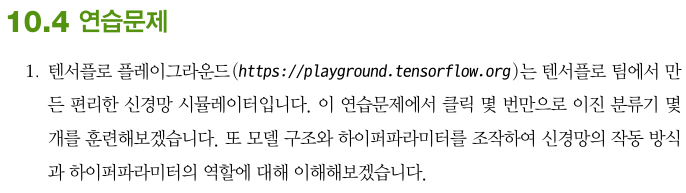
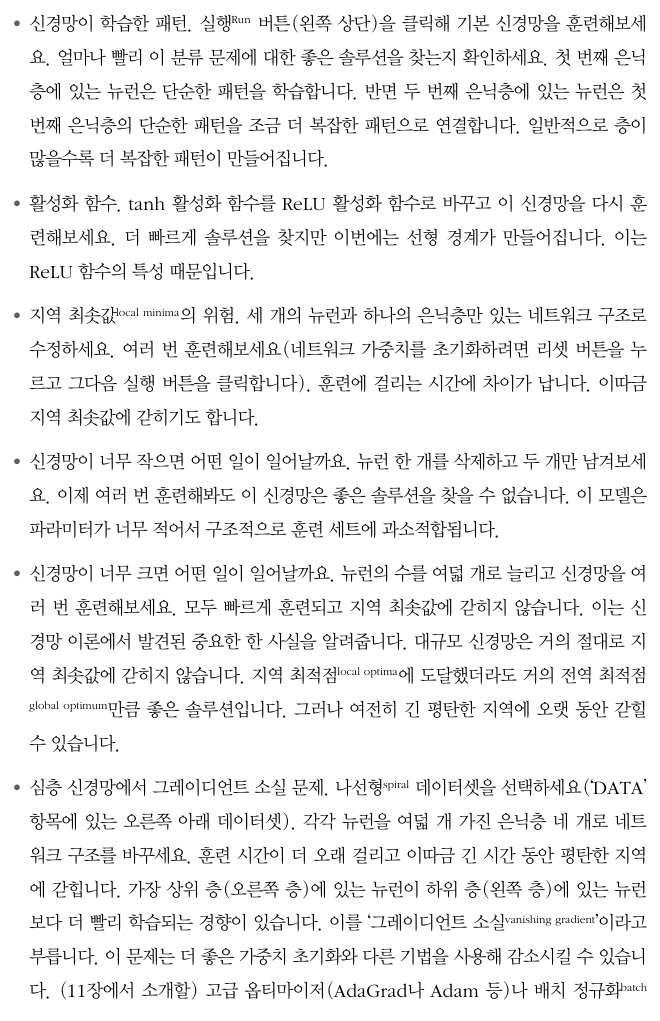
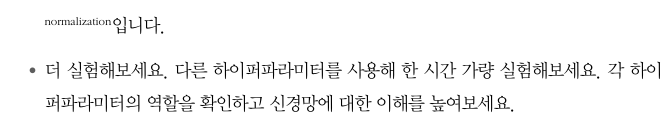

1. https://playground.tensorflow.org 에서 뉴런 및 은닉층 개수와 파라미터를 변화 시키면서 확인

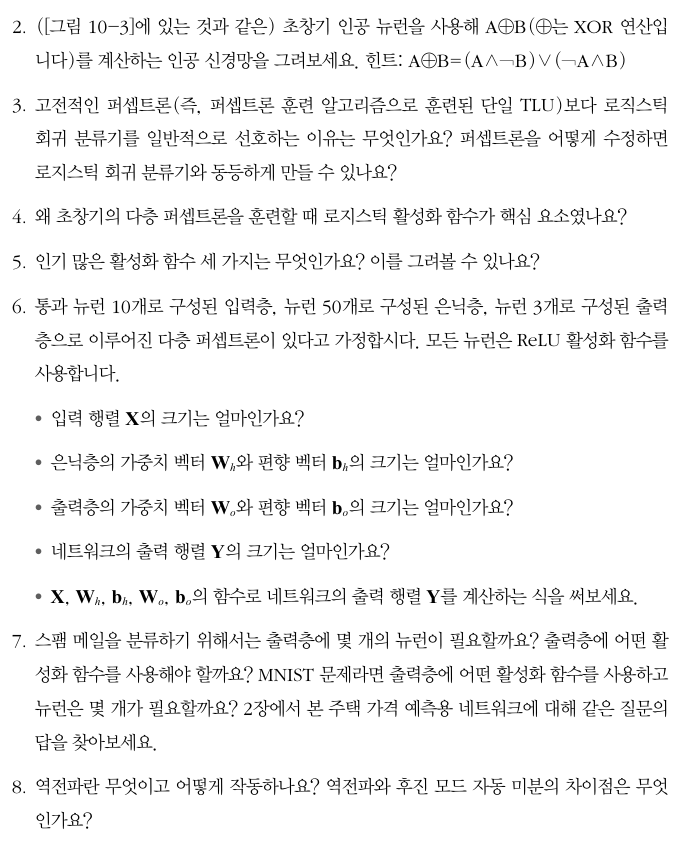

3. 고전적인 퍼셉트론은 데이터셋이 선형적으로 구분될 때만 수렴하고 클래스 확률을 추정할 수 없음.  
   로지스틱 회귀 분류기는 선형적으로 구분되지 않는 데이터셋에서도 좋은 솔루션으로 수렴하고 클래스 확률 출력  
   퍼셉트론의 활성화 함수는 로지스틱(시그모이드)로 바꾸고, 경사하강법 및 교차 엔트로피등의 최적화 알고리즘을 사용
   
   
4. 계단 함수는 경사가 없으므로 경사 하강법이 이동할 수가 없었음.  
   로지스틱 활성화 함수(시그모이드)의 도함수는 어디에서나 0이 아니므로 경사하강법 사용 가능
   
   
5. 시그모이드, ReLU등


6. 입력 행렬 X : m * 10 (m은 훈련 배치 크기)  
   가중치 벡터 : 10 * 50, 편향 벡터 : 1* 50  
   출력층의 가중치 벡터 : 50 * 3, 편향 벡터 : 1 * 3  
   출력 행렬 : m * 3
   
   
7. 스팸 메일 : 출력층에는 스팸인지 아닌지 확률을 표시할 뉴런 1개  
   MNIST : 출력층 뉴련 10개, 클래스의 확률을 출력하기위해 소프트맥스 사용
   
   
8. 역전파는 인공신경망을 훈련시키는 기법.  
   모델의 모든 파라미터(가중치와 편향)에 대해 비용함수의 그래디언트(기울기)를 게산하고 그래디언드를 사용해서 경사 하강법 스텝 수행  
   역전파는 모델 파라미터가 비용 함수를 최소화하는 값을 수렴할 때까지 일반적으로 수천 혹은 수백만번 수행됨  
   후진 모드 자동 미분은 그래디언트를 효과적으로 계산하는 기법으로 역전파에서 사용됨

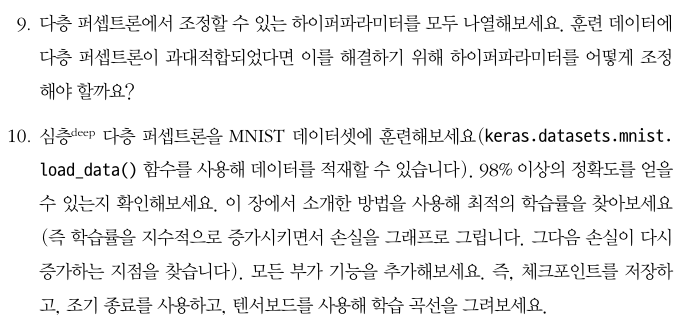

9. 은닉층 수, 각 은닉층의 뉴런 수, 각 은닉층과 출력층에서 사용할 활성화 함수  
   일반적으로 은닉층의 활성화 함수는 ReLU  
   출력층에서는 분류에서는 시그모이드, 다중 분류는 소프트맥스, 회귀에서는 항등함수(사용하지 않는 거나 마찬가지)  
   MLP가 과대 적합이라면 은닉층 수와 각 은닉층 에 있는 뉴런 수를 줄여볼 수 있음

In [18]:
#연습문제 10 - 심층 다층 퍼셉트론을 MNIST 데이터셋에 훈련하기

#데이터셋 적재

(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [19]:
X_train_full.shape

(60000, 28, 28)

In [21]:
X_train_full[0] #픽셀 강도는 0-255

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [22]:
#전체 훈련 세트를 훈련 세트와 검증 세트로 나누기

X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

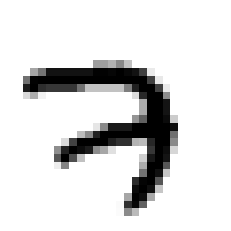

In [23]:
plt.imshow(X_train[0], cmap="binary")
plt.axis("off")
plt.show()

In [24]:
y_train[0]

7

In [25]:
X_valid.shape, X_test.shape

((5000, 28, 28), (10000, 28, 28))

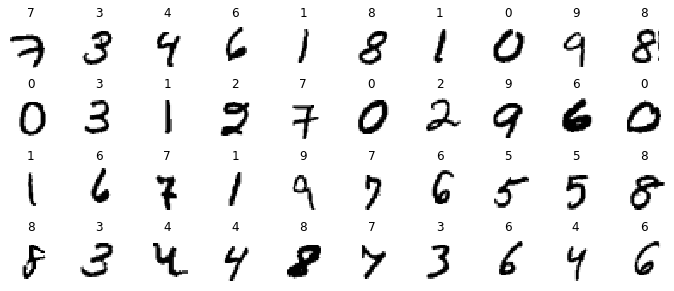

In [30]:
n_rows = 4
n_cols = 10

plt.figure(figsize=(n_cols*1.2, n_rows*1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = row * n_cols + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[row * n_cols + col], cmap="binary", interpolation="nearest")
        plt.axis("off")
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [31]:
#간단한 밀집 신경망을 통해 최적의 학습률 찾기
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)

In [32]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [33]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [35]:
#작은 학습률 1e-3 부터 시작해서 0.5%씩 증가

model.compile(loss="sparse_categorical_crossentropy",
             optimizer=keras.optimizers.SGD(learning_rate=1e-3),
             metrics=["accuracy"])
expon_learning_rate = ExponentialLearningRate(factor=1.005)

In [36]:
#1에포크만 해보기
history = model.fit(X_train, y_train, epochs=1,
                   validation_data=(X_valid, y_valid),
                   callbacks=[expon_learning_rate])

1719/1719 [==============================] - 3s 2ms/step - loss: nan - accuracy: 0.5731 - val_loss: nan - val_accuracy: 0.0958


Text(0, 0.5, 'Loss')

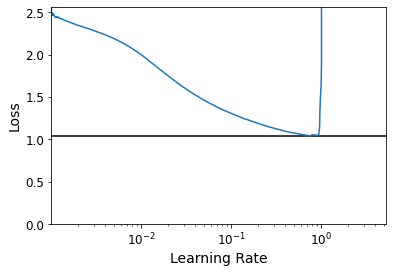

In [37]:
#학습률에 대한 함수로 손실을 그려보기

plt.plot(expon_learning_rate.rates, expon_learning_rate.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_learning_rate.losses), min(expon_learning_rate.rates), max(expon_learning_rate.rates))
plt.axis([min(expon_learning_rate.rates), max(expon_learning_rate.rates), 0, expon_learning_rate.losses[0]])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")

손실이 3e-1(0.3)부터 치솟기 시작하므로 2e-1(0.2)를 학습률로 사용

In [40]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [41]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [42]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=keras.optimizers.SGD(learning_rate=2e-1),
             metrics=["accuracy"])

In [43]:
run_index = 1 # 실행할 때마다 이 값을 늘립니다
run_logdir = os.path.join(os.curdir, "my_mnist_logs", "run_{:03d}".format(run_index))
run_logdir

'.\\my_mnist_logs\\run_001'

In [44]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping_cb, checkpoint_cb, tensorboard_cb])

Epoch 1/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2376 - accuracy: 0.9273 - val_loss: 0.1056 - val_accuracy: 0.9672
Epoch 2/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0940 - accuracy: 0.9714 - val_loss: 0.0901 - val_accuracy: 0.9740
Epoch 3/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0653 - accuracy: 0.9792 - val_loss: 0.0780 - val_accuracy: 0.9780
Epoch 4/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0468 - accuracy: 0.9850 - val_loss: 0.0759 - val_accuracy: 0.9794
Epoch 5/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0331 - accuracy: 0.9889 - val_loss: 0.0700 - val_accuracy: 0.9800
Epoch 6/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0271 - accuracy: 0.9912 - val_loss: 0.0630 - val_accuracy: 0.9840
Epoch 7/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0202 - accuracy: 0.9933 - val_loss: 0.0754 - val_ac

In [45]:
model = keras.models.load_model("my_mnist_model.h5") # rollback to best model
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 856us/step - loss: 0.0649 - accuracy: 0.9808


[0.06494415551424026, 0.9807999730110168]

In [51]:
#정확도는 98% 텐서보드로 살펴보기

%load_ext tensorboard
%tensorboard --logdir=./my_mnist_logs --port=6006

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 8900), started 0:01:01 ago. (Use '!kill 8900' to kill it.)